<a href="https://colab.research.google.com/github/vl0/ML-Deep-Learning/blob/main/03_convolutional_neural_networks_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import zipfile
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Download zip file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()



--2022-11-03 08:32:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   136MB/s    in 0.8s    

2022-11-03 08:32:12 (136 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Get the class names
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img


Image shape: (512, 512, 3)


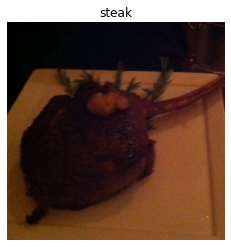

In [ ]:
img = view_random_image(target_dir ="pizza_steak/train",
                        target_class = "steak")

In [ ]:
# set the seed

tf.random.set_seed(42)

# Preprocessing

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train and test dir
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data=test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Create a CNN 
#tf.random.set_seed(42)
#
# 1. Create the model

#model_1 = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters=10,
#                           kernel_size=3,
#                           activation="relu",
#                           input_shape=(224,224,3)),
#   tf.keras.layers.Conv2D(10,3, activation="relu"),
#   tf.keras.layers.MaxPool2D(pool_size=2,
#                             padding="valid"),
#   tf.keras.layers.Conv2D(10, 3, activation="relu"),
#   tf.keras.layers.Conv2D(10, 3, activation="relu"),
#   tf.keras.layers.MaxPool2D(2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid")

#]) 
# 2. Compile the model
#model_1.compile(loss="binary_crossentropy",
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# 3. Fit the model

#model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

In [ ]:
#model_1.summary()

In [ ]:
# Random seed
#tf.random.set_seed(42)

# 1. Create model

#model_2=tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
#    tf.keras.layers.Dense(4, activation="relu"),
#    tf.keras.layers.Dense(4, activation="relu"),
#    tf.keras.layers.Dense(1, activation="sigmoid")
#])

# 2. Compile the model

#model_2.compile(loss="binary_crossentropy",
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# 3. Fit the model

#history_2 = model_2.fit(train_data, epochs=5,
#                        steps_per_epoch=len(train_data),
#                        validation_data=valid_data,
#                        validation_steps=len(valid_data))

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Comple

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit

#history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
#                        validation_data = valid_data,
#                        validation_steps=len(valid_data))

In [ ]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#plt.figure()
#plt.subplot(1, 2, 1)
#steak_img=view_random_image("pizza_steak/train", "steak")
#plt.subplot(1, 2, 2)
#pizza_img=view_random_image("pizza_steak/train", "pizza")




In [ ]:
# Preprocessing data
train_dir = "pizza_steak/train"
test_dir="pizza_steak/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn data into batches

train_data = train_datagen.flow_from_directory( directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)


test_data = test_datagen.flow_from_directory( directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# Create a model

model_4 = Sequential([
    Conv2D( filters=10, kernel_size=3,
           strides=1,
           padding="valid",
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# fit model
history_4=model_4.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data = test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 377ms/step - loss: 1.4672 - accuracy: 0.6460 - val_loss: 0.4980 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 0.4768 - accuracy: 0.7960 - val_loss: 0.4198 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3748 - accuracy: 0.8433 - val_loss: 0.4120 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2352 - accuracy: 0.9200 - val_loss: 0.7017 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1043 - accuracy: 0.9727 - val_loss: 0.5721 - val_accuracy: 0.7840


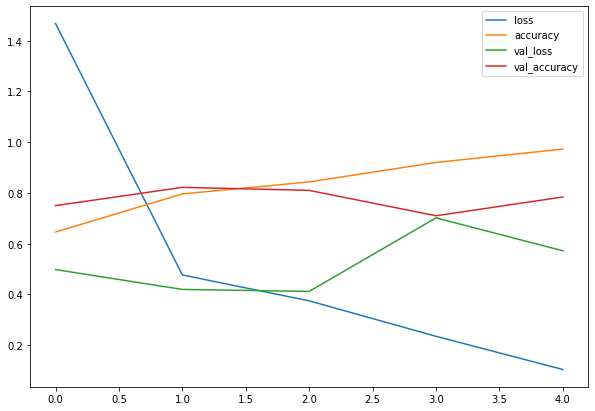

In [ ]:
# plot the training cruves

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# plot the validation and traing data separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy= history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


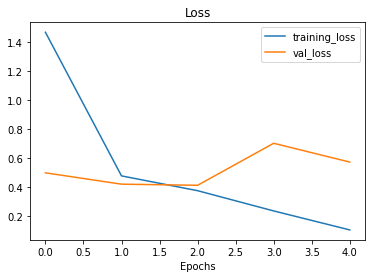

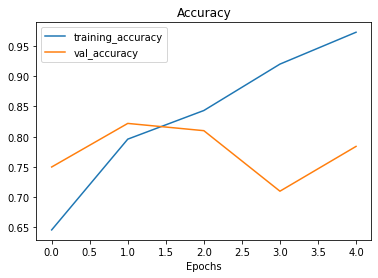

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])



In [ ]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6340 - accuracy: 0.6347 - val_loss: 0.4737 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4733 - accuracy: 0.7780 - val_loss: 0.4180 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4173 - accuracy: 0.8133 - val_loss: 0.3677 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3979 - accuracy: 0.8267 - val_loss: 0.3764 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3842 - accuracy: 0.8273 - val_loss: 0.3160 - val_accuracy: 0.8840


In [ ]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)      

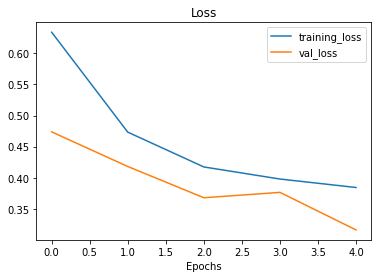

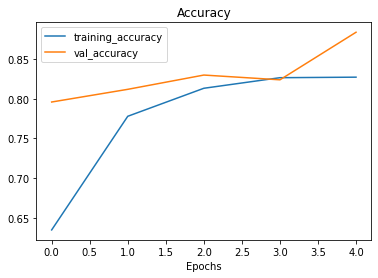

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

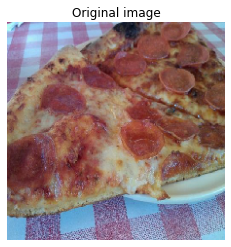

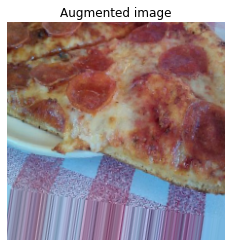

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);



In [ ]:


# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 22s 452ms/step - loss: 0.7086 - accuracy: 0.5207 - val_loss: 0.6832 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 23s 489ms/step - loss: 0.6844 - accuracy: 0.5420 - val_loss: 0.6420 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6765 - accuracy: 0.5820 - val_loss: 0.5963 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6421 - accuracy: 0.6680 - val_loss: 0.5102 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5853 - accuracy: 0.7167 - val_loss: 0.4735 - val_accuracy: 0.8040


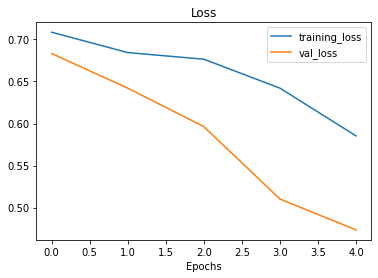

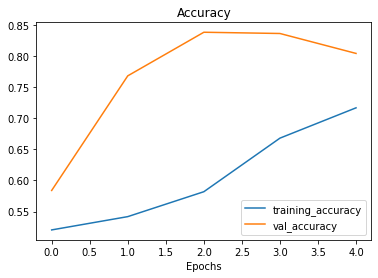

In [ ]:
plot_loss_curves(history_6)


In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          batch_size=32,
                                                                          class_mode='binary',
                                                                          shuffle=True
                                                                )

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 23s 473ms/step - loss: 0.6491 - accuracy: 0.6147 - val_loss: 0.6431 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5663 - accuracy: 0.7040 - val_loss: 0.4692 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 21s 445ms/step - loss: 0.5195 - accuracy: 0.7580 - val_loss: 0.3906 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4940 - accuracy: 0.7727 - val_loss: 0.3634 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 23s 481ms/step - loss: 0.4679 - accuracy: 0.7860 - val_loss: 0.3575 - val_accuracy: 0.8540


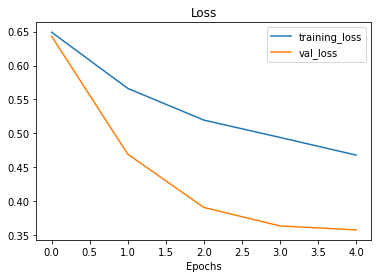

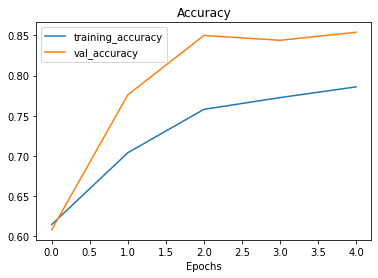

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 478ms/step - loss: 0.6477 - accuracy: 0.6167 - val_loss: 0.5350 - val_accuracy: 0.7760
Epoch 2/10
47/47 [==============================] - 22s 458ms/step - loss: 0.5292 - accuracy: 0.7493 - val_loss: 0.4202 - val_accuracy: 0.8240
Epoch 3/10
47/47 [==============================] - 22s 462ms/step - loss: 0.5106 - accuracy: 0.7527 - val_loss: 0.4297 - val_accuracy: 0.8140
Epoch 4/10
47/47 [==============================] - 22s 475ms/step - loss: 0.5023 - accuracy: 0.7607 - val_loss: 0.4129 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4779 - accuracy: 0.7973 - val_loss: 0.3571 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 24s 508ms/step - loss: 0.4652 - accuracy: 0.7907 - val_loss: 0.3350 - val_accuracy: 0.8660
Epoch 7/10
47/47 [==============================] - 22s 461ms/step - loss: 0.4700 - accuracy: 0.7780 - val_loss: 0.4326 - val_accuracy: 0.8040

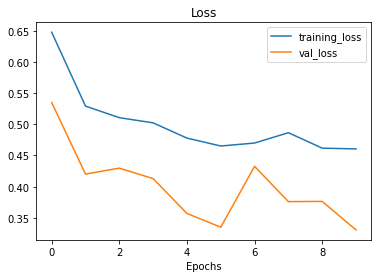

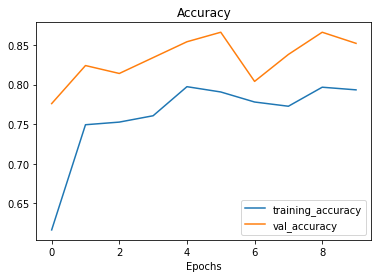

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)



In [ ]:
print(class_names)

['pizza' 'steak']


--2022-11-03 08:41:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-11-03 08:41:51 (238 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



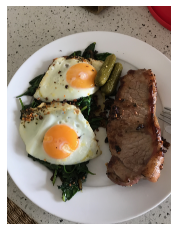

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# add an extra exis
print(f"Shape before new dimension: {steak.shape}")
steak=tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred=model_8.predict(steak)
pred

1/1 [==============================] - 0s 66ms/step


array([[0.8639094]], dtype=float32)

In [ ]:
# Index the predicted class by rounding the prediction probability

pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports and image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title
  """

  #import the target image and preprocess it
  img=load_and_prep_image(filename)

  #Make a prediction
  pred=model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)



1/1 [==============================] - 0s 19ms/step


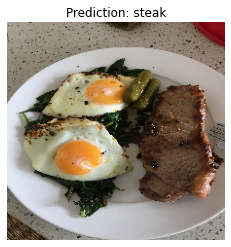

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-11-03 08:41:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-11-03 08:41:53 (196 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 16ms/step


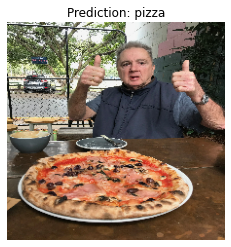

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

### Multiclass Classificatiom

In [ ]:
# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-03 08:58:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.13.240, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   136MB/s    in 3.8s    

2022-11-03 08:58:12 (130 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 0 images in '10_food_classes_all_data.
There are 10 directories and 0 images in '10_food_classes_all_data/train.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings.
There are 1

In [ ]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test"

In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


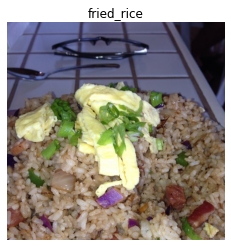

In [ ]:
img = view_random_image(target_dir = train_dir,
                        target_class=random.choice(class_names))

In [ ]:
# Preprocessing data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turn it into batches

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create a model

model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 200ms/step - loss: 2.1263 - accuracy: 0.2348 - val_loss: 2.0197 - val_accuracy: 0.2760
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 1.9164 - accuracy: 0.3343 - val_loss: 1.9354 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.6735 - accuracy: 0.4284 - val_loss: 1.8828 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 48s 203ms/step - loss: 1.1695 - accuracy: 0.6161 - val_loss: 2.1343 - val_accuracy: 0.3276
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.5822 - accuracy: 0.8123 - val_loss: 2.9150 - val_accuracy: 0.2968


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 2.9150 - accuracy: 0.2968


[2.914968729019165, 0.29679998755455017]

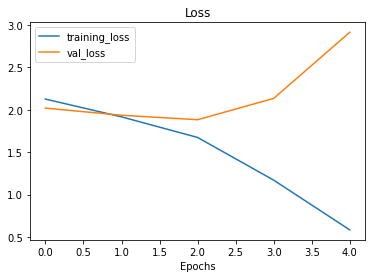

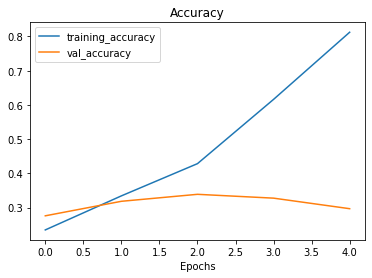

In [ ]:
plot_loss_curves (history_9)

In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 192ms/step - loss: 2.2263 - accuracy: 0.2224 - val_loss: 1.9973 - val_accuracy: 0.2976
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.8035 - accuracy: 0.3803 - val_loss: 1.9000 - val_accuracy: 0.3248
Epoch 3/5
235/235 [==============================] - 47s 200ms/step - loss: 1.4203 - accuracy: 0.5393 - val_loss: 2.0401 - val_accuracy: 0.3148
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.9808 - accuracy: 0.6960 - val_loss: 2.2570 - val_accuracy: 0.2968
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.5728 - accuracy: 0.8365 - val_loss: 2.6064 - val_accuracy: 0.2932


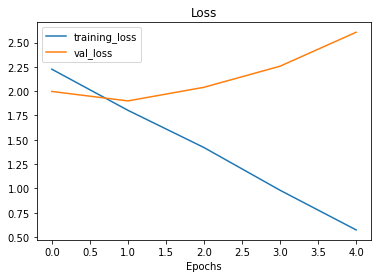

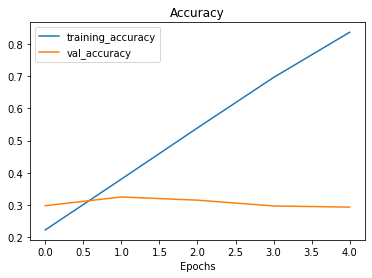

In [ ]:


# Check out the loss curves of model_10
plot_loss_curves(history_10)



In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')



Found 7500 images belonging to 10 classes.


In [ ]:


# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))



Epoch 1/5
235/235 [==============================] - 110s 462ms/step - loss: 2.2923 - accuracy: 0.1668 - val_loss: 2.1051 - val_accuracy: 0.2448
Epoch 2/5
235/235 [==============================] - 110s 468ms/step - loss: 2.1239 - accuracy: 0.2395 - val_loss: 1.9456 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 108s 458ms/step - loss: 2.0354 - accuracy: 0.2893 - val_loss: 1.8889 - val_accuracy: 0.3364
Epoch 4/5
235/235 [==============================] - 107s 453ms/step - loss: 1.9904 - accuracy: 0.3017 - val_loss: 1.8527 - val_accuracy: 0.3796
Epoch 5/5
235/235 [==============================] - 109s 463ms/step - loss: 1.9616 - accuracy: 0.3175 - val_loss: 1.7723 - val_accuracy: 0.4044


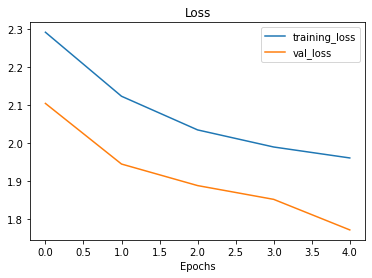

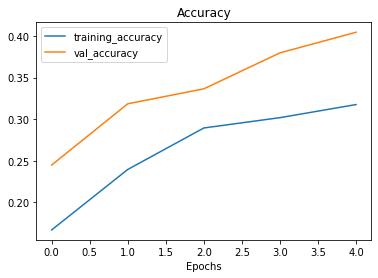

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

